# NOAA Trackline data explorer

Using this to pick out certain segments of data.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta

In [69]:
def parse_timedelta(td_str):
    parts = td_str.split(':')
    hours, minutes, seconds = map(int, parts)
    return pd.Timedelta(hours=hours, minutes=minutes, seconds=seconds)

In [86]:
data = pd.read_csv('./processed/noaa_tracklines/ew0007.csv', header=0, index_col=0, parse_dates=True, dtype=float)
data['TIME'] = data.index - data.index[0]
# These lines are temporary, new processor does this automatically:
duplicate_mask = data.index.duplicated(keep='last')
data = data[~duplicate_mask]

In [87]:
data.head()

,LAT,LON,BAT_TTIME,CORR_DEPTH,MAG_TOT,MAG_RES,FREEAIR,TIME
2000-07-16 12:35:00-12:00,46.53655,-46.60380,1.328,980.0,50395.0,-10.0,20.8,0 days 00:00:00
2000-07-16 12:36:00-12:00,46.53579,-46.59946,1.333,984.0,50394.0,-10.0,21.2,0 days 00:01:00
2000-07-16 12:37:00-12:00,46.53508,-46.59514,1.339,988.0,50386.0,-16.0,21.9,0 days 00:02:00
2000-07-16 12:38:00-12:00,46.53432,-46.59085,1.345,993.0,50388.0,-14.0,22.6,0 days 00:03:00
2000-07-16 12:39:00-12:00,46.53360,-46.58655,1.349,996.0,50393.0,-7.0,23.4,0 days 00:04:00


In [103]:
data = pd.read_csv('./processed/+marine_trackline_16.csv', header=0, index_col=0, parse_dates=True, dtype={'LAT':float, 'LON':float, 'BAT_TTIME':float, 'CORR_DEPTH':float, 'MAG_TOT':float, 'MAG_RES':float, 'TIME':str})

In [104]:
data.head()

,LAT,LON,BAT_TTIME,CORR_DEPTH,MAG_TOT,MAG_RES,FREEAIR,TIME
2001-12-28 08:10:00+05:00,-47.80270,101.70574,3.766,2798.0,61381.0,25.0,36.8,19 days 02:27:00
2001-12-28 08:11:00+05:00,-47.80155,101.70690,3.763,2796.0,61380.0,24.0,37.6,19 days 02:28:00
2001-12-28 08:12:00+05:00,-47.80039,101.70805,3.731,2772.0,61381.0,25.0,38.1,19 days 02:29:00
2001-12-28 08:13:00+05:00,-47.79921,101.70916,3.780,2809.0,61380.0,24.0,35.9,19 days 02:30:00
2001-12-28 08:14:00+05:00,-47.79803,101.71035,3.784,2812.0,61380.0,23.0,32.8,19 days 02:31:00


In [105]:
data['TIME'] = pd.to_timedelta(data['TIME'])

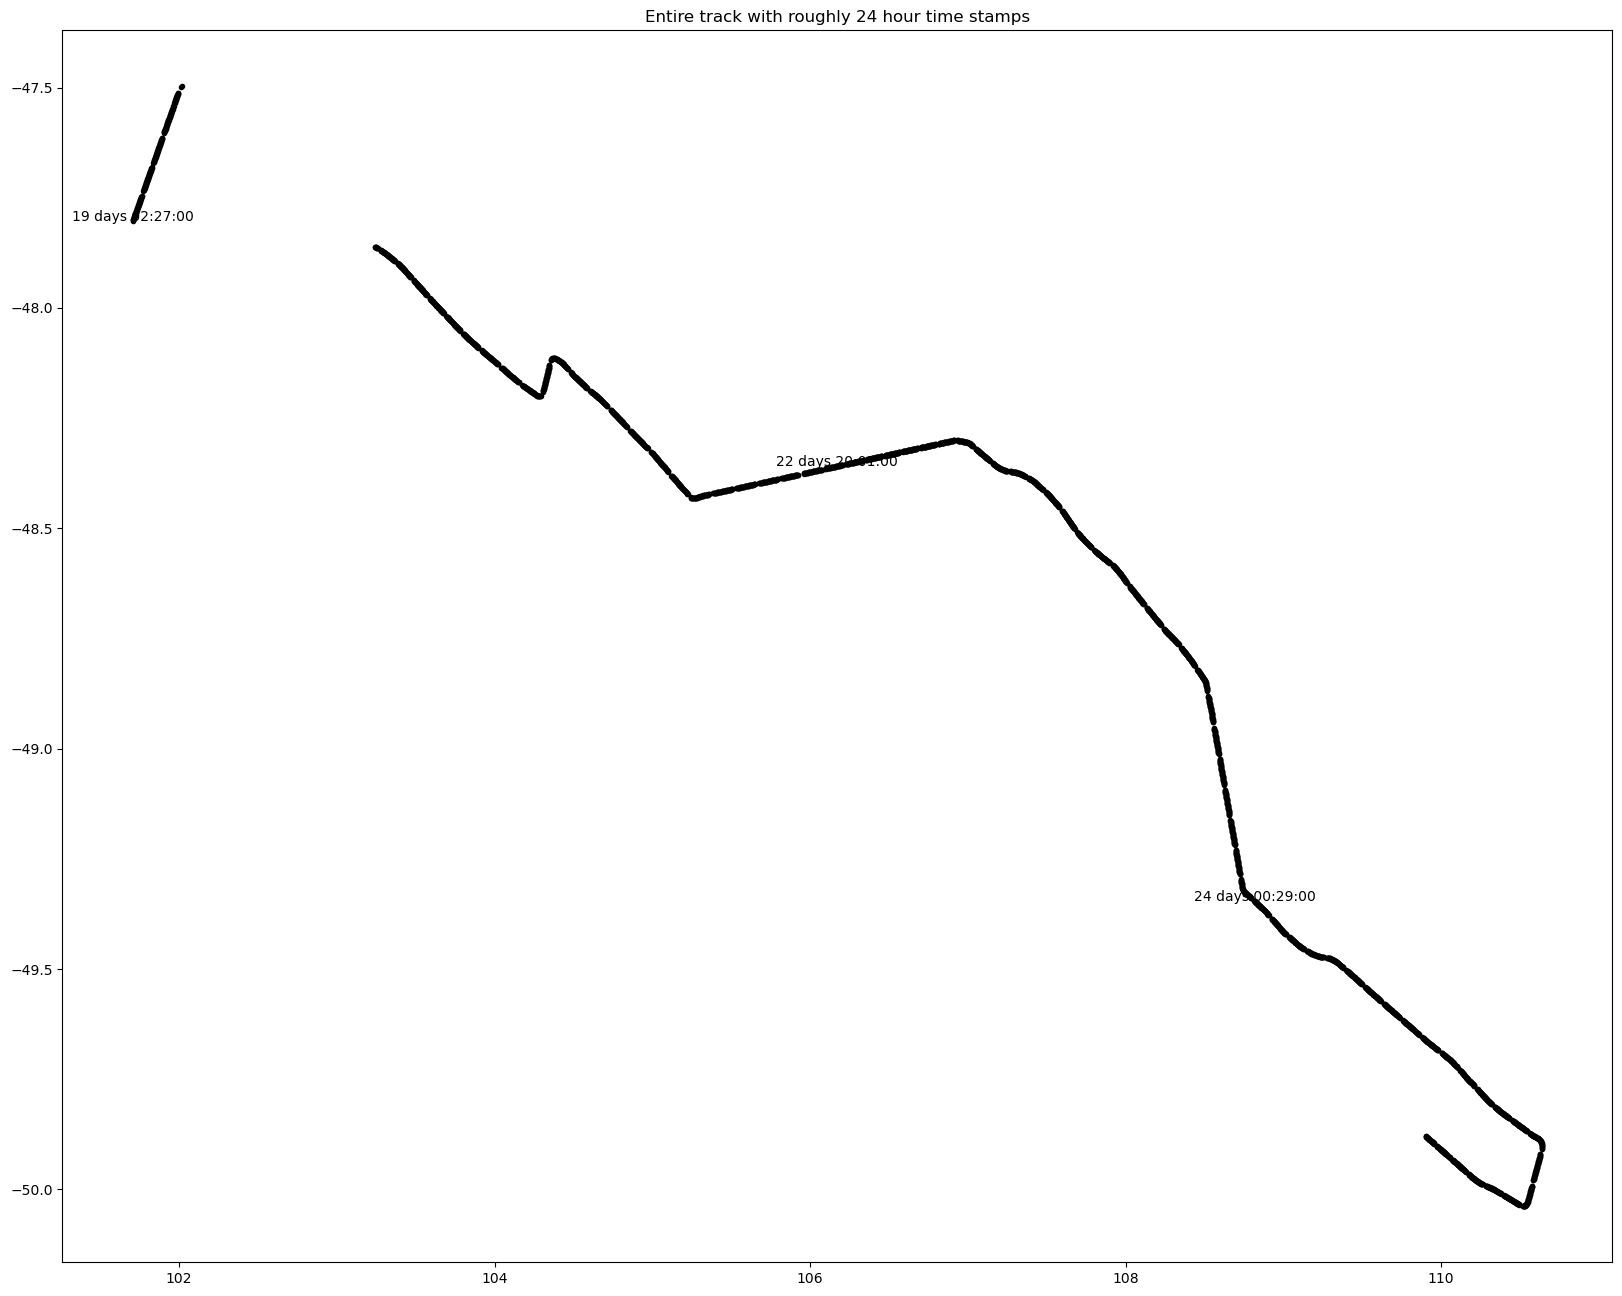

In [108]:
label_frequency = 60*24
fig, ax = plt.subplots(1,1, figsize=(20,16))
ax.plot(data.LON, data.LAT, '.k')
for i, delta in enumerate(data.TIME):
    if i % label_frequency == 0:
        ax.annotate(delta, (data.LON[i], data.LAT[i]),
                     textcoords="offset points", xytext=(0, 0), ha='center')
plt.title('Entire track with roughly 24 hour time stamps')
plt.show()

In [159]:
pos_a = data.iloc[0]
pos_a = pos_a.to_dict()
pos_a = (pos_a['LAT'], pos_a['LON'])
pos_b = data.loc[data.TIME <= timedelta(days=24)].iloc[-1]
pos_b = pos_b.to_dict()
pos_b = (pos_b['LAT'], pos_b['LON'])

In [316]:
I = 14

In [114]:
days = [(20, 30),
        ]

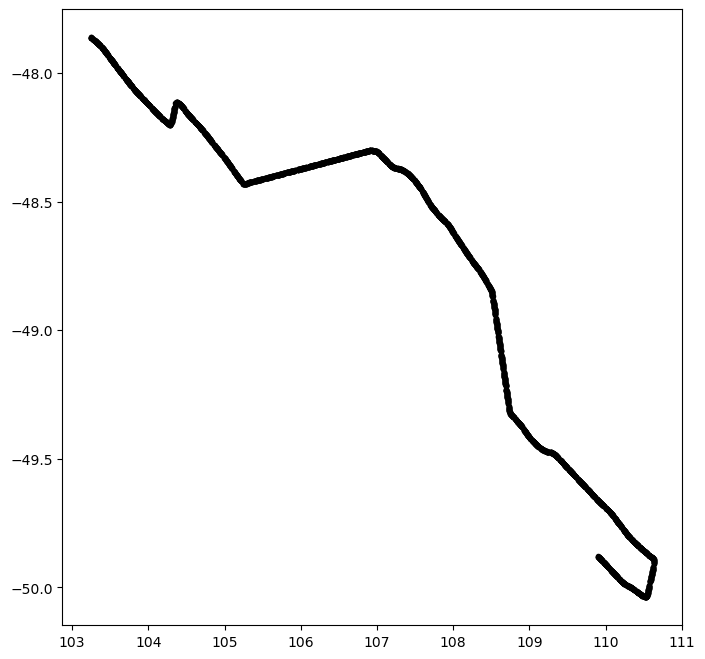

In [113]:
start = 20
stop =  30

subset = data.loc[(data.TIME >= timedelta(days=start)) & (data.TIME <= timedelta(days=stop))]
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.plot(subset.LON, subset.LAT, '.k')

plt.show()

In [101]:
def subdivide_dataset(data, break_points, out_folder, index=0):
    i = index
    for (start, stop) in break_points:
        subset = data.loc[(data.TIME >= timedelta(days=start)) & (data.TIME <= timedelta(days=stop))]
        subset['TIME'] = subset.index - subset.index[0]
        subset.to_csv(f'{out_folder}/marine_trackline_{i}.csv')
        i+=1
    return i

In [115]:
I = 16
I = subdivide_dataset(data, days, './processed/', index=I)

In [3]:
from glob import glob

In [4]:
data = glob('./processed/*.csv')

In [6]:
# Reset time column
for file in data:
    my_data = pd.read_csv(file, header=0, index_col=0, parse_dates=True, dtype={'LAT':float, 'LON':float, 'BAT_TTIME':float, 'CORR_DEPTH':float, 'MAG_TOT':float, 'MAG_RES':float, 'TIME':str})
    my_data.TIME = my_data.index - my_data.index[0]
    my_data.to_csv(file)